In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [5]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [7]:
#Convert Subscription_Start_Date and Date_of_Churn data type to date
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  1000 non-null   int64         
 1   Age                      1000 non-null   int64         
 2   Gender                   1000 non-null   object        
 3   Location                 1000 non-null   object        
 4   Subscription_Start_Date  1000 non-null   datetime64[ns]
 5   Subscription_Type        1000 non-null   object        
 6   Monthly_Payment          1000 non-null   float64       
 7   Payment_Method           1000 non-null   object        
 8   Monthly_Hours_Watched    1000 non-null   float64       
 9   Favorite_Genre           1000 non-null   object        
 10  Devices_Used             1000 non-null   object        
 11  Average_Session_Length   1000 non-null   float64       
 12  Content_ID               1000 non-n

In [9]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN


In [39]:
df.describe(include='all')

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
count,1000.000000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,246,246
unique,NaN,NaN,3,5,NaN,3,NaN,3,NaN,5,4,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,Other,West,NaN,Standard,NaN,Credit Card,NaN,Drama,Mobile,NaN,NaN,NaN,NaN,NaN,Price increase
freq,NaN,NaN,336,216,NaN,530,NaN,613,NaN,212,408,NaN,NaN,NaN,NaN,NaN,68
mean,500.500000,44.385000,NaN,NaN,2021-09-18 17:08:01.662466560,NaN,14.580000,NaN,19.071653,NaN,NaN,1.893771,1049.201000,3.030000,0.246000,2022-02-28 15:27:17.174715904,NaN
min,1.000000,18.000000,NaN,NaN,2019-05-10 01:53:37.659073,NaN,9.990000,NaN,0.041574,NaN,NaN,0.000486,1000.000000,1.000000,0.000000,2019-08-11 01:53:37.658920,NaN
25%,250.750000,31.750000,NaN,NaN,2020-05-15 19:53:37.664891136,NaN,9.990000,NaN,5.490739,NaN,NaN,0.548918,1023.000000,2.000000,0.000000,2020-11-15 07:53:37.659917824,NaN
50%,500.500000,45.000000,NaN,NaN,2021-08-21 01:53:37.662536448,NaN,14.990000,NaN,13.361219,NaN,NaN,1.271808,1048.000000,3.000000,0.000000,2021-11-20 01:53:37.661230336,NaN
75%,750.250000,57.000000,NaN,NaN,2023-01-09 07:53:37.664328192,NaN,14.990000,NaN,26.471636,NaN,NaN,2.623575,1075.000000,4.000000,0.000000,2023-06-05 01:53:37.660055808,NaN
max,1000.000000,70.000000,NaN,NaN,2024-05-06 01:53:37.662112,NaN,19.990000,NaN,139.170408,NaN,NaN,11.417557,1099.000000,5.000000,1.000000,2025-02-09 01:53:37.661719,NaN


<Axes: xlabel='Subscription_Type', ylabel='Monthly_Hours_Watched'>

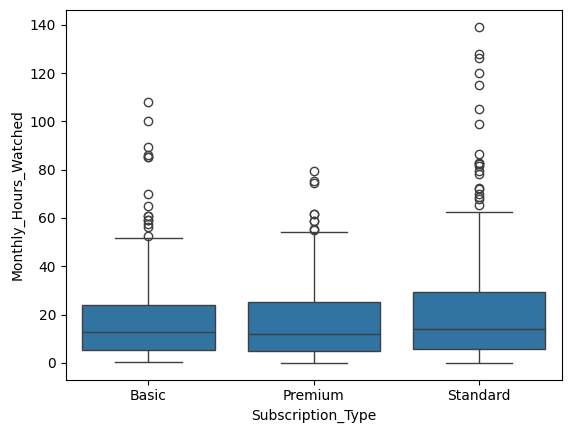

In [40]:
sns.boxplot(x='Subscription_Type', y='Monthly_Hours_Watched', data=df)

<Axes: xlabel='Favorite_Genre', ylabel='Average_Session_Length'>

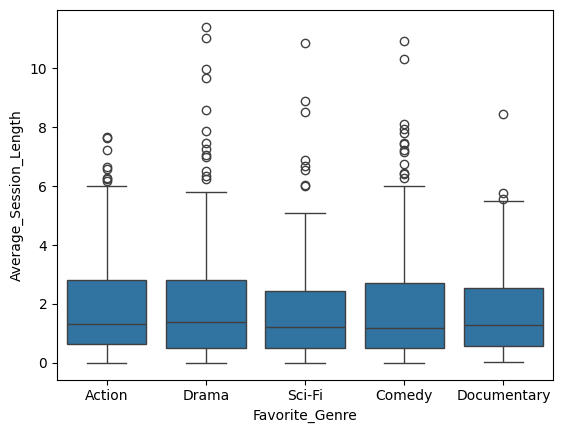

In [12]:
sns.boxplot(x='Favorite_Genre', y='Average_Session_Length', data=df)

<Axes: xlabel='Devices_Used', ylabel='Average_Session_Length'>

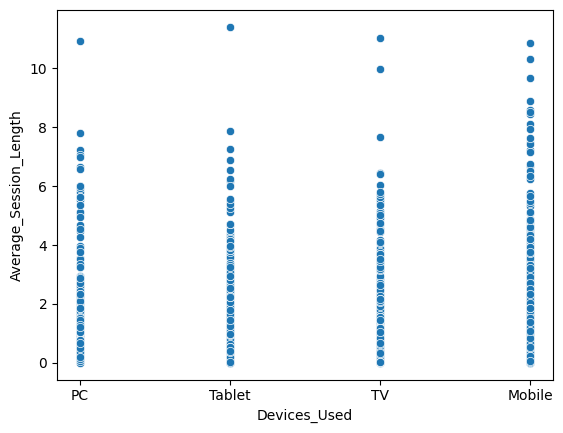

In [13]:
sns.scatterplot(x='Devices_Used', y='Average_Session_Length', data=df)

In [14]:
df.groupby('Location')['Average_Session_Length'].mean()

Location
Central    2.057238
East       1.765785
North      1.809283
South      1.890815
West       1.942407
Name: Average_Session_Length, dtype: float64

In [15]:
df.isnull().sum()/100 

User_ID                    0.00
Age                        0.00
Gender                     0.00
Location                   0.00
Subscription_Start_Date    0.00
Subscription_Type          0.00
Monthly_Payment            0.00
Payment_Method             0.00
Monthly_Hours_Watched      0.00
Favorite_Genre             0.00
Devices_Used               0.00
Average_Session_Length     0.00
Content_ID                 0.00
Rating_Given               0.00
Churned                    0.00
Date_of_Churn              7.54
Reason_for_Churn           7.54
dtype: float64

In [16]:
df.isnull().sum().sum() / df.drop('User_ID', axis=1).size

0.09425

In [17]:
df.size

17000

In [18]:
#Replace missing values with data
df['Date_of_Churn'].fillna('Not Churned')
df['Reason_for_Churn'].fillna('Unknown')

0                   Unknown
1                   Unknown
2                   Unknown
3                   Unknown
4                   Unknown
               ...         
995    Found better service
996                 Unknown
997                 Unknown
998    Found better service
999                 Unknown
Name: Reason_for_Churn, Length: 1000, dtype: object

In [19]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN


In [20]:
categorical_cols = ['Gender', 'Location', 'Subscription_Type', 'Payment_Method', 'Favorite_Genre', 'Devices_Used']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  1000 non-null   int64         
 1   Age                      1000 non-null   int64         
 2   Gender                   1000 non-null   category      
 3   Location                 1000 non-null   category      
 4   Subscription_Start_Date  1000 non-null   datetime64[ns]
 5   Subscription_Type        1000 non-null   category      
 6   Monthly_Payment          1000 non-null   float64       
 7   Payment_Method           1000 non-null   category      
 8   Monthly_Hours_Watched    1000 non-null   float64       
 9   Favorite_Genre           1000 non-null   category      
 10  Devices_Used             1000 non-null   category      
 11  Average_Session_Length   1000 non-null   float64       
 12  Content_ID               1000 non-n

<Axes: xlabel='Age'>

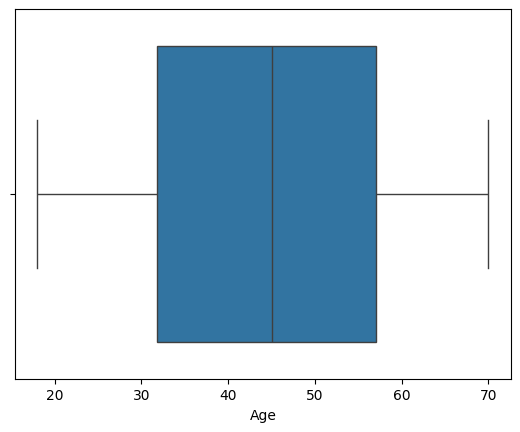

In [22]:
sns.boxplot(x='Age', data=df)

In [23]:
df.describe(include='all')

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
count,1000.000000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,246,246
unique,NaN,NaN,3,5,NaN,3,NaN,3,NaN,5,4,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,Other,West,NaN,Standard,NaN,Credit Card,NaN,Drama,Mobile,NaN,NaN,NaN,NaN,NaN,Price increase
freq,NaN,NaN,336,216,NaN,530,NaN,613,NaN,212,408,NaN,NaN,NaN,NaN,NaN,68
mean,500.500000,44.385000,NaN,NaN,2021-09-18 17:08:01.662466560,NaN,14.580000,NaN,19.071653,NaN,NaN,1.893771,1049.201000,3.030000,0.246000,2022-02-28 15:27:17.174715904,NaN
min,1.000000,18.000000,NaN,NaN,2019-05-10 01:53:37.659073,NaN,9.990000,NaN,0.041574,NaN,NaN,0.000486,1000.000000,1.000000,0.000000,2019-08-11 01:53:37.658920,NaN
25%,250.750000,31.750000,NaN,NaN,2020-05-15 19:53:37.664891136,NaN,9.990000,NaN,5.490739,NaN,NaN,0.548918,1023.000000,2.000000,0.000000,2020-11-15 07:53:37.659917824,NaN
50%,500.500000,45.000000,NaN,NaN,2021-08-21 01:53:37.662536448,NaN,14.990000,NaN,13.361219,NaN,NaN,1.271808,1048.000000,3.000000,0.000000,2021-11-20 01:53:37.661230336,NaN
75%,750.250000,57.000000,NaN,NaN,2023-01-09 07:53:37.664328192,NaN,14.990000,NaN,26.471636,NaN,NaN,2.623575,1075.000000,4.000000,0.000000,2023-06-05 01:53:37.660055808,NaN
max,1000.000000,70.000000,NaN,NaN,2024-05-06 01:53:37.662112,NaN,19.990000,NaN,139.170408,NaN,NaN,11.417557,1099.000000,5.000000,1.000000,2025-02-09 01:53:37.661719,NaN


<Axes: xlabel='Location', ylabel='count'>

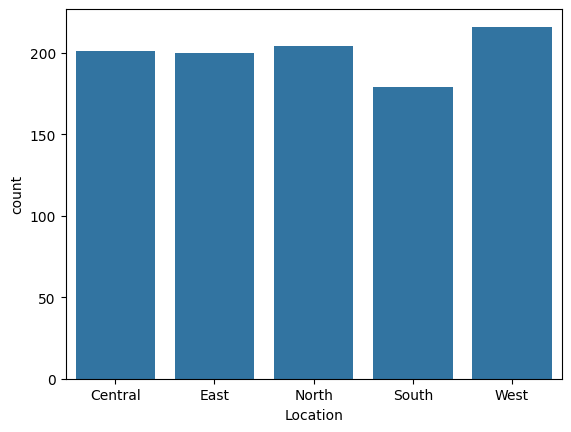

In [24]:
sns.countplot(x='Location', data=df)

<Axes: xlabel='Subscription_Type', ylabel='count'>

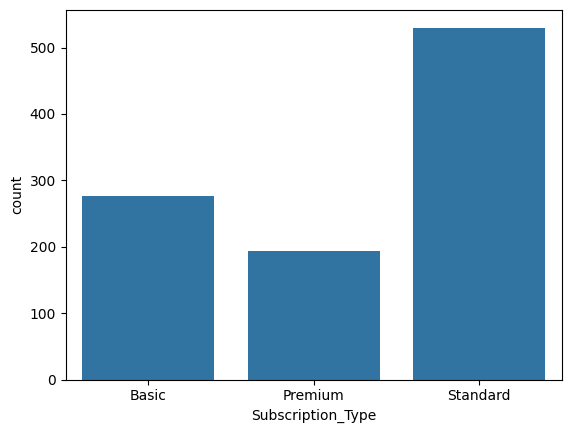

In [25]:
sns.countplot(x='Subscription_Type', data=df)

<Axes: xlabel='Monthly_Payment', ylabel='Count'>

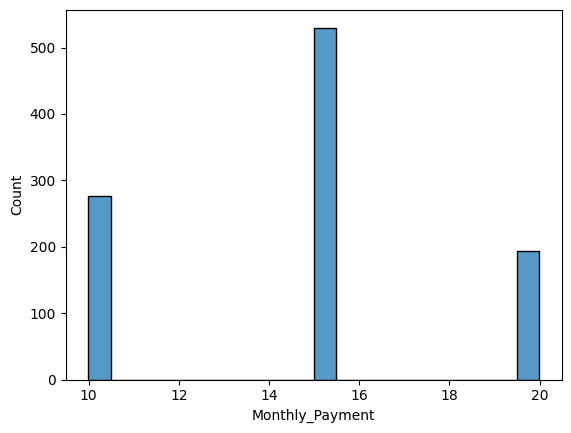

In [26]:
sns.histplot(df['Monthly_Payment'], bins=20)

In [27]:
df.groupby('Subscription_Type')['Churned'].mean()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_47334/754804819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Subscription_Type')['Churned'].mean()


Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64

<Axes: ylabel='Monthly_Hours_Watched'>

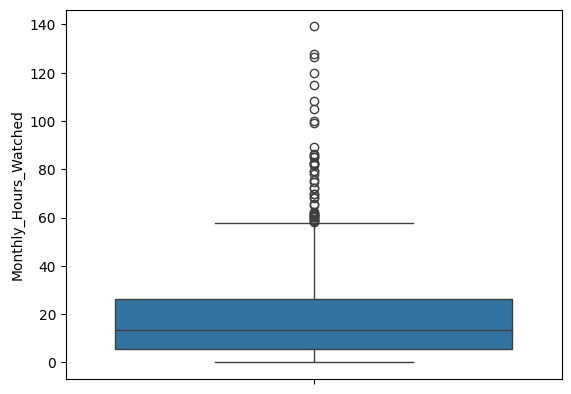

In [28]:
sns.boxplot(df['Monthly_Hours_Watched'])

In [29]:
df.groupby('Gender')['Churned'].mean()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_47334/1491268118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Churned'].mean()


Gender
Female    0.257576
Male      0.224551
Other     0.255952
Name: Churned, dtype: float64

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_47334/4037430008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('Subscription_Type')['Churned'].mean().reset_index()


<Axes: xlabel='Subscription_Type', ylabel='Churned'>

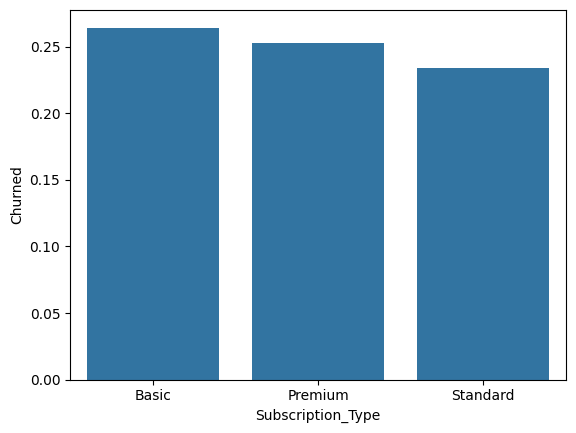

In [30]:
churn_rate = df.groupby('Subscription_Type')['Churned'].mean().reset_index()
sns.barplot(x='Subscription_Type', y='Churned', data=churn_rate)

<Axes: xlabel='Monthly_Hours_Watched', ylabel='Count'>

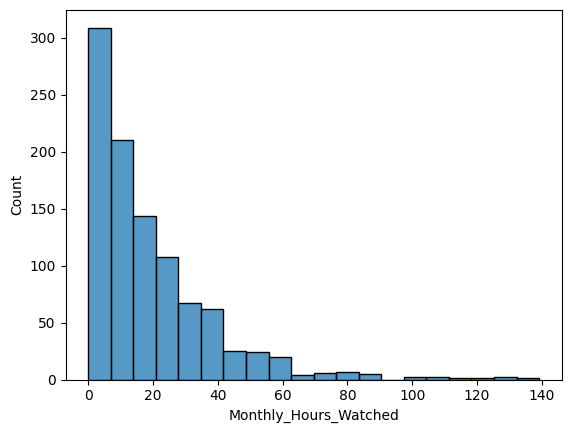

In [31]:
sns.histplot(df['Monthly_Hours_Watched'], bins=20)

<Axes: ylabel='Average_Session_Length'>

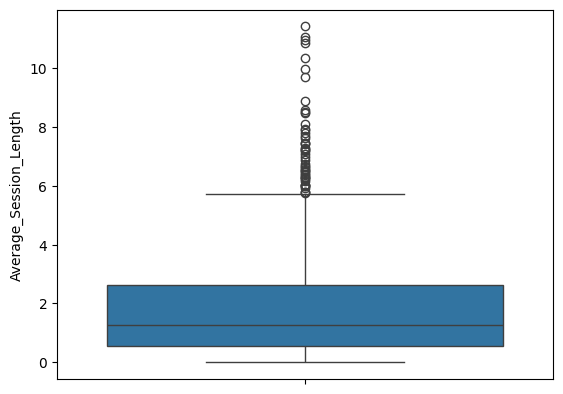

In [32]:
sns.boxplot(df['Average_Session_Length'])

<Axes: xlabel='Favorite_Genre', ylabel='count'>

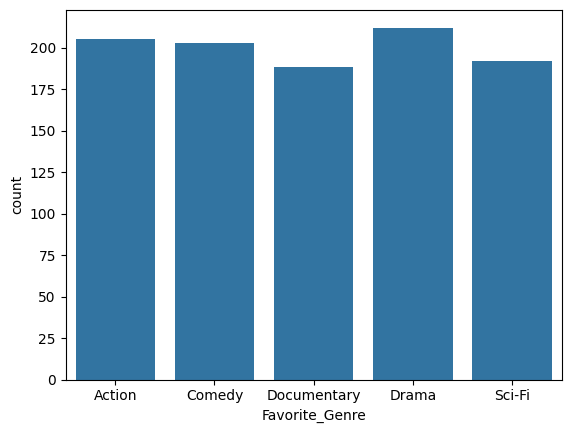

In [33]:
sns.countplot(x='Favorite_Genre', data=df)

In [34]:
churn_rate = df['Churned'].mean()

In [35]:
retention_rate = 1 - churn_rate

In [36]:
retention_rate

0.754

<Axes: xlabel='Payment_Method', ylabel='count'>

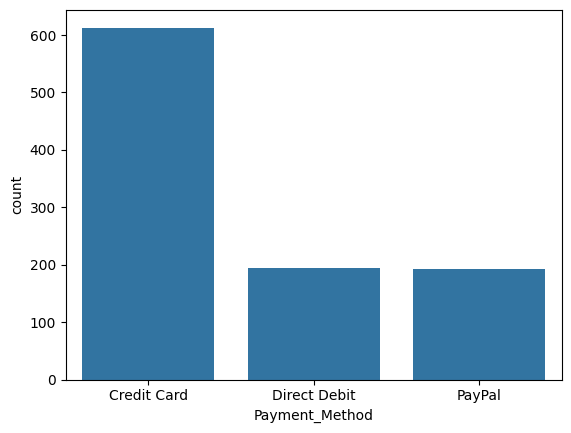

In [37]:
sns.countplot(x='Payment_Method', data=df)

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_47334/764031213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('Location')['Churned'].mean().reset_index()


<Axes: xlabel='Location', ylabel='Churned'>

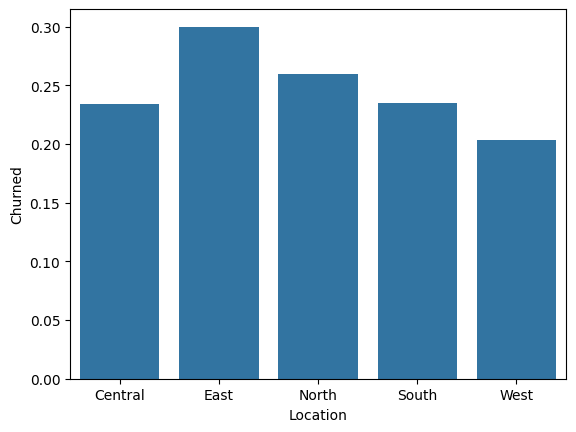

In [38]:
churn_rate = df.groupby('Location')['Churned'].mean().reset_index()
sns.barplot(x='Location', y='Churned', data=churn_rate)

In [ ]:
sns.barplot(x='Gender', y='Gender', data=df)

In [41]:
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaT,NaN
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaT,NaN
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service


/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_47334/1600718012.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_users = df.groupby('Location')['User_ID'].count()
/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_47334/1600718012.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_users = df.groupby('Location')['Churned'].sum()


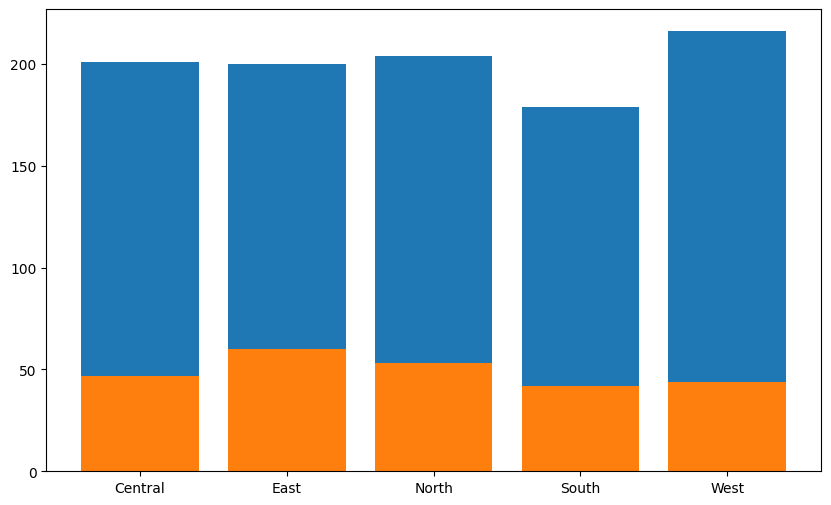

In [55]:
# Calculate total number of users and churned users by location
total_users = df.groupby('Location')['User_ID'].count()
churned_users = df.groupby('Location')['Churned'].sum()

# Calculate churn rate
Churn_rate= (total_users / churned_users) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot total users
total_bar = ax.bar(total_users.index, total_users, label='Total Users')

# Plot churned users on top of total users
churned_bar = ax.bar(churned_users.index, churned_users, label='Churned Users')

plt.show()

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_47334/2989162654.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_users_by_gender = df.groupby('Gender')['User_ID'].count()
/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_47334/2989162654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_users_by_gender = df.groupby('Gender')['Churned'].sum()


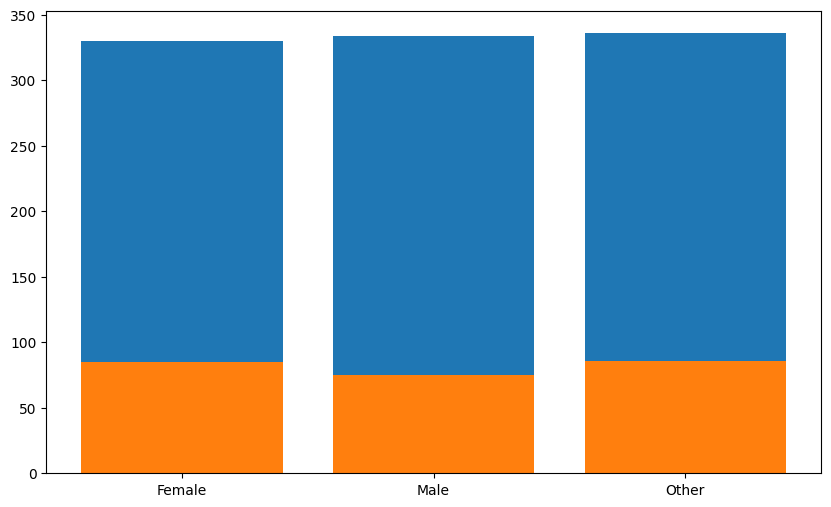

In [56]:
# Calculate total number of users and churned users by location
total_users_by_gender = df.groupby('Gender')['User_ID'].count()
churned_users_by_gender = df.groupby('Gender')['Churned'].sum()

# Calculate churn rate
Churn_rate= (total_users_by_gender / churned_users_by_gender) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot total users
total_bar = ax.bar(total_users_by_gender.index, total_users_by_gender, label='Total Users')

# Plot churned users on top of total users
churned_bar = ax.bar(churned_users_by_gender.index, churned_users_by_gender, label='Churned Users')

plt.show()

In [57]:
Age.unique()

NameError: name 'Age' is not defined